##Kaggle

In [ ]:
#https://www.kaggle.com/paultimothymooney/blood-cells
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 7.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=e4d48625f1266a68fa8435d684c0534b4dc7c1b19e9eb3fa855f23619758f073
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bluecoder1206","key":"68dcf0f9521940e72f2268bd6739a6e9"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d paultimothymooney/blood-cells

 90% 97.0M/108M [00:01<00:00, 37.7MB/s]
100% 108M/108M [00:01<00:00, 65.5MB/s] 


In [ ]:
!unzip blood-cells.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset/dataset2-

##CNN

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_path="/content/dataset/dataset2-master/dataset2-master/images/TRAIN"
test_path="/content/dataset/dataset2-master/dataset2-master/images/TEST"

In [ ]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(training_path,image_size=(200,200),batch_size=32)

Found 9957 files belonging to 4 classes.


In [ ]:
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(test_path,image_size=(200,200),batch_size=32)

Found 2487 files belonging to 4 classes.


In [ ]:
CNNmodel = tf.keras.models.Sequential()

# Feature Extraction part - Convulutional Layers

#First Conv Layer
CNNmodel.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200, 3)))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
CNNmodel.add(tf.keras.layers.BatchNormalization())
#Second Conv Layer
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
#Third Conv Layer
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
#Fourth Conv Layer
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))
#Fifth Conv Layer
CNNmodel.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D(2,2))

# Neural Network - For classification
CNNmodel.add(tf.keras.layers.Flatten())
CNNmodel.add(tf.keras.layers.Dense(128, activation='relu'))
CNNmodel.add(tf.keras.layers.Dropout(0.7))
CNNmodel.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel.add(tf.keras.layers.Dropout(0.3))
CNNmodel.add(tf.keras.layers.Dense(4,activation='softmax'))



In [ ]:
CNNmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 99, 99, 16)        64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 97, 97, 64)        9280      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 64)       

In [ ]:
CNNmodel.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ['accuracy'])

In [ ]:
history = CNNmodel.fit(train_dataset, validation_data=test_dataset, epochs = 15 )

Epoch 1/15
312/312 [==============================] - 23s 71ms/step - loss: 1.3711 - accuracy: 0.2920 - val_loss: 1.1120 - val_accuracy: 0.3940
Epoch 2/15
312/312 [==============================] - 22s 70ms/step - loss: 0.9980 - accuracy: 0.5034 - val_loss: 1.9769 - val_accuracy: 0.4612
Epoch 3/15
312/312 [==============================] - 22s 70ms/step - loss: 0.5869 - accuracy: 0.7494 - val_loss: 0.7205 - val_accuracy: 0.7668
Epoch 4/15
312/312 [==============================] - 23s 72ms/step - loss: 0.3064 - accuracy: 0.8783 - val_loss: 0.5251 - val_accuracy: 0.8597
Epoch 5/15
312/312 [==============================] - 23s 71ms/step - loss: 0.2282 - accuracy: 0.9079 - val_loss: 0.3828 - val_accuracy: 0.8536
Epoch 6/15
312/312 [==============================] - 22s 71ms/step - loss: 0.1944 - accuracy: 0.9238 - val_loss: 0.8496 - val_accuracy: 0.8822
Epoch 7/15
312/312 [==============================] - 22s 71ms/step - loss: 0.1475 - accuracy: 0.9468 - val_loss: 0.5633 - val_accuracy:

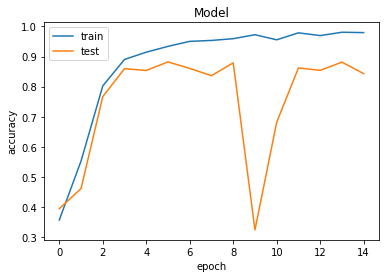

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

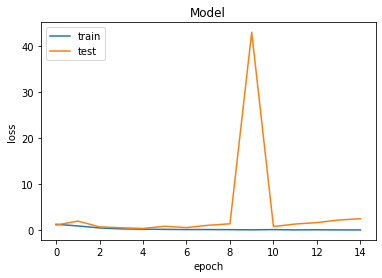

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()